In [1]:
import os

os.chdir(r'D:\subFinder')

In [2]:
import pandas as pd
import gensim
from Codes.Supervised_Trainer import run_end_to_end
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# jf_marine = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.marine.clean", sep = "\t", header = None)

In [4]:
# jf_oral = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.oral.clean", sep = "\t", header = None)

In [5]:
# jf_rumen = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.rumen.clean", sep = "\t", header = None)

In [6]:
jf_oral = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.oral.clean", sep = "\t", header = None)

In [7]:
jf_oral.shape

(1722, 12)

In [8]:
# jf_all = pd.concat([jf_marine, jf_oral, jf_rumen, jf_uhgg], 0, ignore_index = True)

In [9]:
# jf_all = jf_all[[1,2,3,4]]

In [10]:
jf_oral = jf_oral[[1,2,3,4]]

In [11]:
jf_oral.columns = ["cgc_id", "sig_gene_seq", "PULid", "high_level_substr"]

In [12]:
jf_oral.head()

,cgc_id,sig_gene_seq,PULid,high_level_substr
0,MGYG000298024_1|CGC6,"GT35,null,GH77,GH77,3.A.1.1.20,3.A.1.1.26,3.A....",X,starch
1,MGYG000298038_1|CGC4,"2.A.86.1.3,null,3.A.1.3.15,3.A.1.3.25,3.A.1.3....",X,starch
2,MGYG000298038_1|CGC7,"GH1,GH1,4.A.3.1.1,4.A.3.1.2",X,beta-galactan
3,MGYG000298045_3|CGC1,"GH129,SBP_bac_1,null,3.A.1.1.41,3.A.1.1.11,3.A...",X,sucrose
4,MGYG000298045_3|CGC17,"GH38,GH130,null,3.A.1.1.9,null,3.A.1.1.10,null...",X,host glycan


In [13]:
jf_oral["cgc_id"].value_counts()

MGYG000298181_2|CGC13    4
MGYG000298341_1|CGC32    4
MGYG000298933_1|CGC11    4
MGYG000298197_1|CGC11    3
MGYG000298933_1|CGC16    3
                        ..
MGYG000298358_42|CGC1    1
MGYG000298358_41|CGC1    1
MGYG000298358_40|CGC1    1
MGYG000298358_26|CGC1    1
MGYG000299272_9|CGC1     1
Name: cgc_id, Length: 1446, dtype: int64

In [14]:
jf_oral = jf_oral.drop_duplicates("cgc_id")

In [15]:
jf_oral.shape

(1446, 4)

In [16]:
jf_oral.columns = ["cgc_id", "sig_gene_seq", "PULid", "JF_high_level_substr"]

In [17]:
## read subfinder output
subfinder_oral= pd.read_csv(r"Data/Output/Predictions/Predictions_oral_with_probability_and_p_values_Blast_Style_new_sup_new_unsup.csv")

In [18]:
subfinder_oral.shape

(31346, 4)

In [19]:
subfinder_oral["sequence"].nunique()

4478

In [20]:
subfinder_oral.head()

,sequence,substrate,probability_score,p_value
0,"1.A.1,9.B.143,GH13_20",alginate,0.201333,0.999969
1,"1.A.1,9.B.143,GH13_20",beta-glucan,0.370667,0.999969
2,"1.A.1,9.B.143,GH13_20",cellulose,0.242000,0.999969
3,"1.A.1,9.B.143,GH13_20",host glycan,0.264000,0.999969
4,"1.A.1,9.B.143,GH13_20",pectin,0.291333,0.999969


In [21]:
subfinder_oral.columns = ["sequence", "subFinder_high_level_substr", "probability_score", "p_value"]

In [22]:
len(subfinder_oral.groupby('sequence')['probability_score'].idxmax().values)

4478

In [23]:
subfinder_oral_preds = subfinder_oral.iloc[subfinder_oral.groupby('sequence')['probability_score'].idxmax().values,:]

In [24]:
subfinder_oral_preds = subfinder_oral_preds.reset_index(drop = True)

In [25]:
subfinder_oral_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value
0,"1.A.1,9.B.143,GH13_20",starch,0.413333,0.999969
1,"1.A.1,GH49,3.A.1,null,3.A.9",beta-glucan,0.456667,0.999512
2,"1.A.11,1.A.11,3.A.5,TetR_N,GT2",beta-glucan,0.353333,0.999969
3,"1.A.11,2.A.37,3.A.5,TetR_N,GT2",beta-glucan,0.420000,0.999969
4,"1.A.14,GH20",host glycan,0.505333,0.150879


In [26]:
to_keep = subfinder_oral_preds["subFinder_high_level_substr"].unique()

In [27]:
oral_data = pd.read_csv(r"Data/Output/Unsupervised_10_12/output_humanoral.csv")

In [28]:
oral_data = oral_data.drop_duplicates("sequence")

In [29]:
subfinder_oral_preds = subfinder_oral_preds.merge(oral_data, how = "left", on = "sequence")

In [30]:
subfinder_oral_preds.shape

(4478, 5)

In [31]:
# two filtering
# form jinfang keep those in top_k of subfinder
# and then also the common cgc ids
# some cgc ids from jinfang not found in the new data I received
# but it is minimal

In [32]:
# basically we cant just do common cgc_ids because our model doesn't see those classes to be able to predict them

In [33]:
jf_oral_to_kepp = jf_oral[jf_oral["JF_high_level_substr"].isin(to_keep)]

In [34]:
jf_oral_to_kepp.shape

(486, 4)

In [35]:
overlapped = subfinder_oral_preds.merge(jf_oral_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [36]:
overlapped.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id,JF_high_level_substr
0,"1.A.14,null,GH92,GH92,null,1.B.14",host glycan,0.650667,0.000000,MGYG000299211_40|CGC1,pectin
1,"1.A.23,null,null,GH1,4.A.1,4.A.1,0043669,null,...",starch,0.529333,0.059235,MGYG000298799_6|CGC2,beta-glucan
2,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",starch,0.670667,0.000000,MGYG000298401_1|CGC11,starch
3,"1.A.30,null,GerE,GT35,GH77,PfkB,CBM34|GH13_20",starch,0.598667,0.000031,MGYG000298503_13|CGC1,starch
4,"1.A.43,null,GH97,GH27,GH27,null,8.A.46,1.B.14",starch,0.564667,0.000488,MGYG000298895_66|CGC2,starch


In [37]:
overlapped.shape

(413, 6)

In [38]:
match = overlapped[overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"]]

match = match[["cgc_id", "sequence", "subFinder_high_level_substr", "JF_high_level_substr", "probability_score", "p_value"]]



In [39]:
match = match.sort_values("p_value").reset_index(drop = True)

In [40]:
match.head()

,cgc_id,sequence,subFinder_high_level_substr,JF_high_level_substr,probability_score,p_value
0,MGYG000298401_1|CGC11,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",starch,starch,0.670667,0.0
1,MGYG000298341_1|CGC26,"GH13_14,3.A.1,3.A.1,SBP_bac_1,GH13,GH77",starch,starch,0.758667,0.0
2,MGYG000299054_93|CGC1,"GH13_14,3.A.1,CBM34|GH13_20,3.A.1,3.A.1",starch,starch,0.650000,0.0
3,MGYG000298749_1|CGC2,"GH13_20,null,3.A.1,3.A.1",starch,starch,0.640000,0.0
4,MGYG000298111_35|CGC1,"GH13_30,null,9.B.28,LacI,GH32,3.A.1,GH31,LacI,...",starch,starch,0.742000,0.0


In [41]:
np.percentile(match["p_value"], np.arange(80,85))

array([0.00369263, 0.01757812, 0.01757812, 0.01757812, 0.01757812])

In [42]:
match.to_csv(r"Data\Output\Predictions\oral_match_with_JF.csv", index = False)

In [43]:
match["subFinder_high_level_substr"].value_counts()

starch         185
host glycan     93
beta-glucan     19
pectin          13
xylan           11
cellulose        1
Name: subFinder_high_level_substr, dtype: int64

In [44]:
match.shape

(322, 6)

In [45]:
cgc_id_seqs = match["cgc_id"].values

In [46]:
# rep_seq = np.repeat(cgc_id_seqs, subfinder_oral["subFinder_high_level_substr"].nunique())

In [47]:
subfinder_oral = subfinder_oral.merge(oral_data, how = "left", on = "sequence")

In [48]:
# subfinder_marine.head()

In [49]:
match_full_output = subfinder_oral[subfinder_oral["cgc_id"].isin(cgc_id_seqs)]

In [50]:
match_full_output = match_full_output.reset_index(drop = True)

In [51]:
match_full_output = match_full_output.set_index("cgc_id")

In [52]:
match_full_output = match_full_output.loc[cgc_id_seqs].reset_index()

In [53]:
match_full_output.head()

,cgc_id,sequence,subFinder_high_level_substr,probability_score,p_value
0,MGYG000298401_1|CGC11,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",starch,0.670667,0.000000
1,MGYG000298401_1|CGC11,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",beta-glucan,0.436000,0.999512
2,MGYG000298401_1|CGC11,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",alginate,0.213333,0.999969
3,MGYG000298401_1|CGC11,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",cellulose,0.226667,0.999969
4,MGYG000298401_1|CGC11,"1.A.26,GH13_31,3.A.1,3.A.1,null,SBP_bac_1,3.A....",host glycan,0.364667,0.999969


In [54]:
match_full_output.to_csv(r"Data\Output\Predictions\oral_match_with_JF_Blast.csv", index = False)

In [55]:
overlapped.shape[0] + len(set(jf_oral_to_kepp["cgc_id"].values).difference(oral_data["cgc_id"].values))

486

In [56]:
jf_oral_to_kepp.shape

(486, 4)

In [57]:
len(set(jf_oral_to_kepp["cgc_id"].values).difference(oral_data["cgc_id"].values))

73

In [58]:
np.mean(overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"])

0.7796610169491526

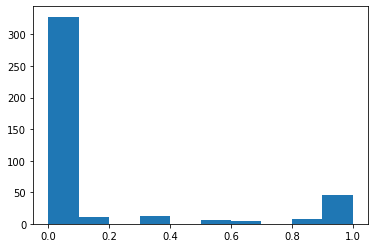

In [59]:
plt.hist(overlapped["p_value"])
plt.show()

In [60]:
thresholded = subfinder_oral_preds[subfinder_oral_preds["p_value"] <= 0.1]

In [61]:
thresholded_overlapped = thresholded.merge(jf_oral_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [62]:
thresholded_overlapped.shape

(328, 6)

In [63]:
np.mean(thresholded_overlapped["subFinder_high_level_substr"] == thresholded_overlapped["JF_high_level_substr"])

0.8475609756097561

In [64]:
jf_oral_to_kepp["JF_high_level_substr"].value_counts()

starch         228
host glycan    127
beta-glucan     48
xylan           45
pectin          35
cellulose        3
Name: JF_high_level_substr, dtype: int64